In [37]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/diogo/programs/anaconda3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['title', 'axes']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [38]:
import numpy as np
import matplotlib.pyplot as plt
import obspy as op
import glob
import os
import matplotlib.ticker as ticker

In [39]:
datalistr = []
datalistSr = []
dir_listr = []
for root, dirs, files in os.walk('/home/diogo/dados_doutorado/parnaiba_basin/redeBP-BB/joint_inversion/gcarc_30_1.0_2.5/'):
    for datafile in files:
        if datafile.startswith('model_9_vs'):
            datalistr.append(os.path.join(root, datafile))
datalistSr = sorted(datalistr)

In [40]:
datalistSr

['/home/diogo/dados_doutorado/parnaiba_basin/redeBP-BB/joint_inversion/gcarc_30_1.0_2.5/BPPF/model_9_vs.txt',
 '/home/diogo/dados_doutorado/parnaiba_basin/redeBP-BB/joint_inversion/gcarc_30_1.0_2.5/BUCO/model_9_vs.txt',
 '/home/diogo/dados_doutorado/parnaiba_basin/redeBP-BB/joint_inversion/gcarc_30_1.0_2.5/GENI/model_9_vs.txt',
 '/home/diogo/dados_doutorado/parnaiba_basin/redeBP-BB/joint_inversion/gcarc_30_1.0_2.5/GRJU/model_9_vs.txt',
 '/home/diogo/dados_doutorado/parnaiba_basin/redeBP-BB/joint_inversion/gcarc_30_1.0_2.5/PRDT/model_9_vs.txt',
 '/home/diogo/dados_doutorado/parnaiba_basin/redeBP-BB/joint_inversion/gcarc_30_1.0_2.5/STSN/model_9_vs.txt',
 '/home/diogo/dados_doutorado/parnaiba_basin/redeBP-BB/joint_inversion/gcarc_30_1.0_2.5/STSR/model_9_vs.txt',
 '/home/diogo/dados_doutorado/parnaiba_basin/redeBP-BB/joint_inversion/gcarc_30_1.0_2.5/TRZN/model_9_vs.txt']

In [41]:
list_model_real = ['/home/diogo/dados_doutorado/parnaiba_basin/redeBP-BB/joint_inversion/gcarc_30_1.0_2.5/BPPF/model_9_vs.txt',
 '/home/diogo/dados_doutorado/parnaiba_basin/redeBP-BB/joint_inversion/gcarc_30_1.0_2.5/STSN/model_9_vs.txt',
 '/home/diogo/dados_doutorado/parnaiba_basin/redeBP-BB/joint_inversion/gcarc_30_1.0_2.5/GRJU/model_9_vs.txt',
 '/home/diogo/dados_doutorado/parnaiba_basin/redeBP-BB/joint_inversion/gcarc_30_1.0_2.5/GENI/model_9_vs.txt',
 '/home/diogo/dados_doutorado/parnaiba_basin/redeBP-UK/joint_inversion/gcarc_30_1.0_2.5/BDCO/model_9_vs.txt',
 '/home/diogo/dados_doutorado/parnaiba_basin/redeBP-BB/joint_inversion/gcarc_30_1.0_2.5/PRDT/model_9_vs.txt',
 '/home/diogo/dados_doutorado/parnaiba_basin/redeBP-BB/joint_inversion/gcarc_30_1.0_2.5/STSR/model_9_vs.txt',
 '/home/diogo/dados_doutorado/parnaiba_basin/redeBP-BB/joint_inversion/gcarc_30_1.0_2.5/BUCO/model_9_vs.txt',
 '/home/diogo/dados_doutorado/parnaiba_basin/redeBP-BB/joint_inversion/gcarc_30_1.0_2.5/TRZN/model_9_vs.txt']


In [42]:
STA_list = [i.split('/')[8] for i in list_model_real]

In [43]:
STA_list

['BPPF', 'STSN', 'GRJU', 'GENI', 'BDCO', 'PRDT', 'STSR', 'BUCO', 'TRZN']

In [44]:
STA_distance = np.arange(0,600,70)

In [45]:
models_joint = [np.genfromtxt(i) for i in list_model_real]

In [46]:
vs = [[],[],[],[],[],[],[],[],[]]
prof = [[],[],[],[],[],[],[],[],[]]
for i,j in enumerate(models_joint):
    for k,l in enumerate(j):
        vs[i].append(l[0])
        prof[i].append((-1)*(l[1]))

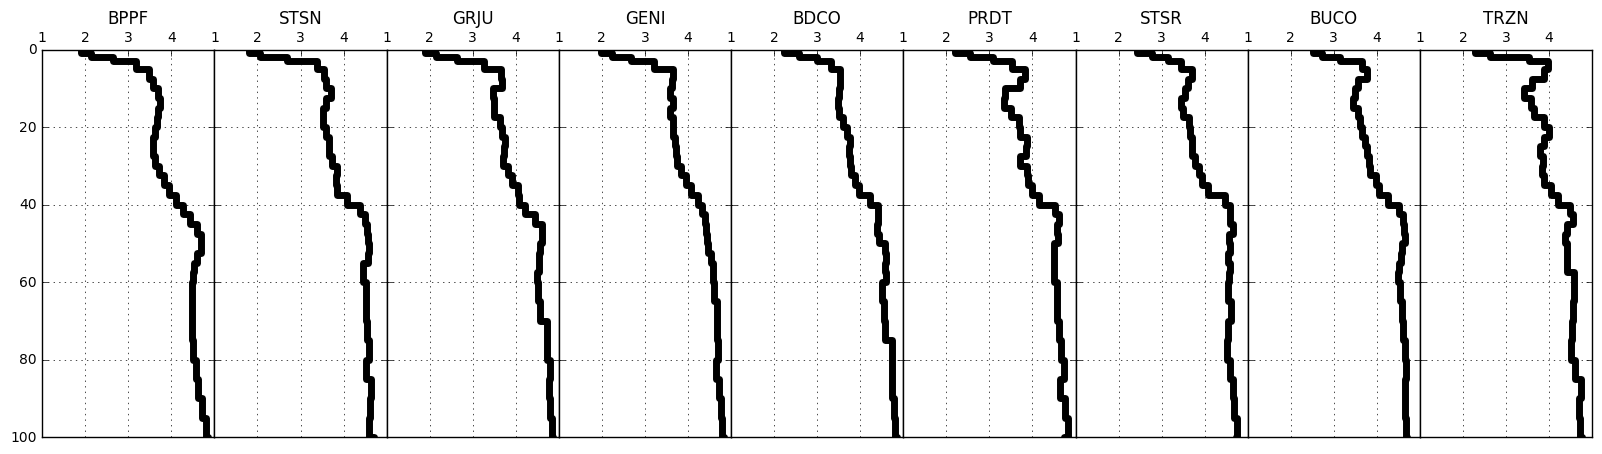

In [48]:
fig, axes = plt.subplots(nrows=1, ncols=9, sharey=True,figsize = (20,5),facecolor='white')

for ax, title, x, y in zip(axes.flat, STA_list, vs, prof):
    ax.step(x, y,'k',lw= 5, where='post')
    ax.set_xlim([1,5])
    ax.xaxis.tick_top()
    ax.xaxis.set_ticks(np.arange(1, 5, 1))
    ax.set_ylim([100,0])
    ax.set_title(title, y=1.05)
    ax.grid(True)
plt.subplots_adjust(wspace=0)
fig.savefig('/home/diogo/dados_doutorado/parnaiba_basin/redeBP-BB/joint_inversion/gcarc_30_1.0_2.5/section_joint_inversion_10_25.png')